In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [15]:
import matplotlib.pyplot as plt 
import plotly.express as px 
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

In [11]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv",index_col='CustomerID')
df.shape

(200, 4)

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [14]:
df=df[['Annual Income (k$)','Spending Score (1-100)']]

In [19]:
k_values=range(2,11)
inertia_list=[]
for k in k_values:
    kmean=KMeans(n_clusters=k,random_state=42)
    kmean.fit(df)
    inertia_list.append(kmean.inertia_)

In [20]:
inertia_list

[181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21862.09267218289,
 19672.07284901432]

Text(0, 0.5, 'Inertia')

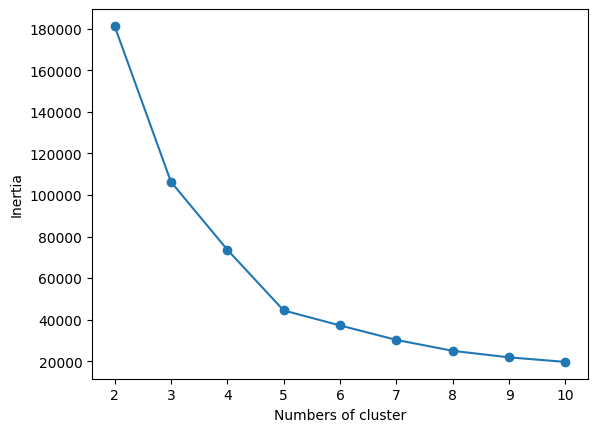

In [26]:
plt.plot(k_values,inertia_list,marker='o')
plt.xlabel("Numbers of cluster")
plt.ylabel("Inertia")


From the elbow method, 5 is a optimal choice of n clusters

In [31]:
n_clusters=5 
kmeans=KMeans(n_clusters,random_state=42)
kmeans.fit(df)
df['cluster']=kmeans.labels_
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

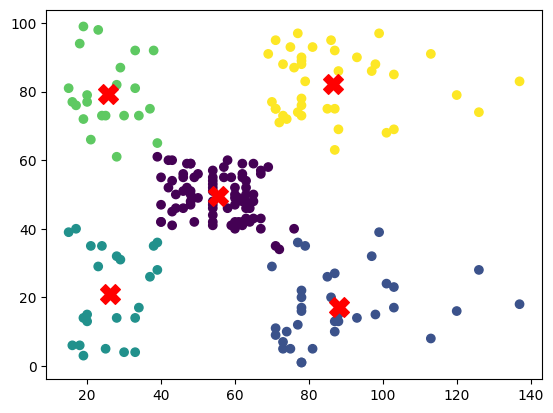

In [45]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c=df['cluster'])

centriods=kmeans.cluster_centers_
plt.scatter(x=centriods[:,0],y=centriods[:,1],marker='X',s=200,c='red')

In [46]:
df.groupby('cluster').mean()

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


In [48]:
pd.DataFrame(df.groupby('cluster').value_counts())

count
cluster Annual Income (k$) Spending Score (1-100)       
0       40                 42                          2
        48                 59                          2
        39                 61                          1
        40                 47                          1
                           55                          1
...                                                  ...
4       103                85                          1
        113                91                          1
        120                79                          1
        126                74                          1
        137                83                          1

[196 rows x 1 columns]